<a href="https://colab.research.google.com/github/VarunMadhav/StockPrediction/blob/main/Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [ ]:
pip install keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('META.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.526337,10352000
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.624115,7502800
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.123581,9213800
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.678299,12768800
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,180.868088,8807700
...,...,...,...,...,...,...,...
1082,2023-09-06,301.709991,303.299988,295.660004,299.170013,298.852936,15418100
1083,2023-09-07,298.000000,307.049988,292.220001,298.670013,298.353455,33748700
1084,2023-09-08,299.220001,305.250000,296.779999,297.890015,297.574280,17548000
1085,2023-09-11,301.410004,309.040009,301.279999,307.559998,307.234009,19489300


In [ ]:
df1 = df.reset_index()['Close']

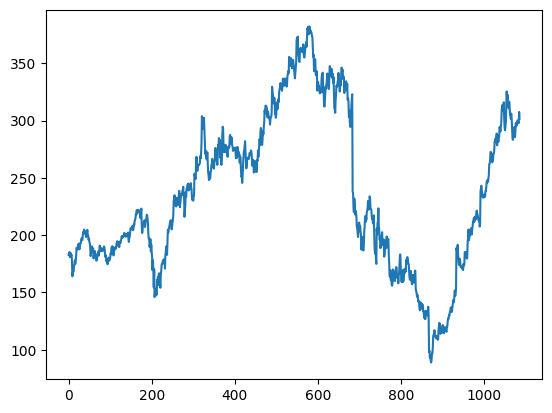

In [ ]:
plt.plot(df1)
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [ ]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
10/10 [==============================] - 9s 329ms/step - loss: 0.1221 - val_loss: 0.0118
Epoch 2/100
10/10 [==============================] - 2s 253ms/step - loss: 0.0173 - val_loss: 0.0069
Epoch 3/100
10/10 [==============================] - 3s 296ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 4/100
10/10 [==============================] - 2s 210ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 5/100
10/10 [==============================] - 2s 185ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 6/100
10/10 [==============================] - 2s 191ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 7/100
10/10 [==============================] - 2s 188ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 8/100
10/10 [==============================] - 2s 195ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 9/100
10/10 [==============================] - 3s 334ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 10/100
10/10 [==============================] - 2s 185ms/step - loss: 0.0035 - val_lo

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

9/9 [==============================] - 0s 37ms/step


In [ ]:
print(f"Training dataset RMSE Value is: { math.sqrt( mean_squared_error( y_train, train_predict ) )}")
print(f"Testing dataset RMSE Value is : { math.sqrt( mean_squared_error( ytest, test_predict ) )}")

Training dataset RMSE Value is: 64.38891398694739
Testing dataset RMSE Value is : 42.125162285821574


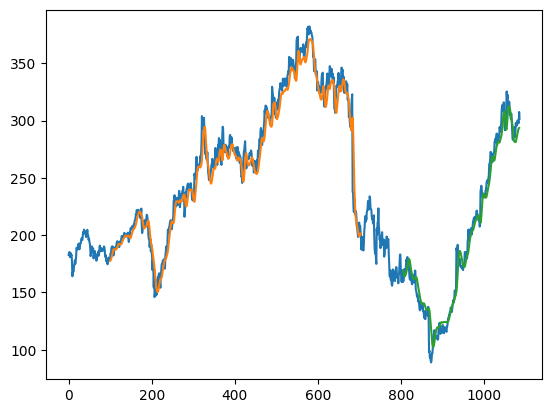

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
n_steps = time_step
i = 0
while i < 200:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [ ]:
predicted_value_after_200_days = scaler.inverse_transform(np.array(lst_output[-1]).reshape(-1, 1))

In [66]:
print(f"Predicted stock closing value after 200 days: {predicted_value_after_200_days[0][0]+335}")

Predicted stock closing value after 200 days: 517.0783743089278
